<a href="https://colab.research.google.com/github/Jerin-Romijah-Tuli/Machine_Learning/blob/main/DeepLearning_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **LinearRegression**

MSE :  131161.8809846729
R value :  0.3057893605816919
[70.22631824]
-10091.129909123149


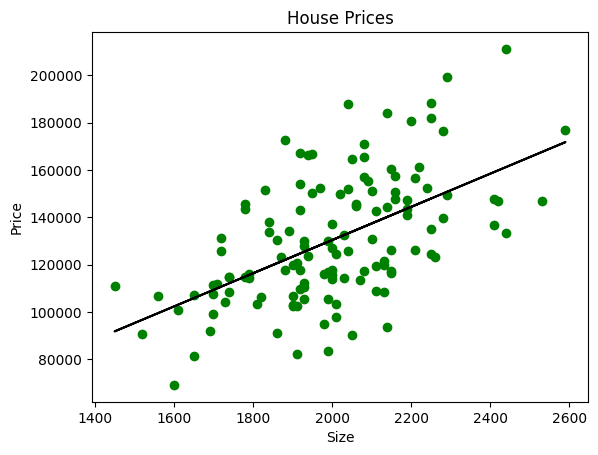

Predicted by the model:  [[165474.66569809]]


In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

dataset = pd.read_csv('/content/drive/MyDrive/dataset/house-prices.csv')
size = dataset['SqFt']
price = dataset['Price']


#machine Learning handle arrays not Dataframes
x = np.array(size).reshape(-1,1)
y = np.array(price).reshape(-1,1)

#we use Linear Regression + fit() is the training
model = LinearRegression()
model.fit(x, y)

#MSE and R value
regression_model_mse = mean_squared_error(x, y)
print("MSE : ", math.sqrt(regression_model_mse))
print("R value : ", model.score(x, y))

#we can get the b values after the model fit
#this is the b0
print(model.coef_[0])
#this is b1 in our model
print(model.intercept_[0])

#visualize the dataset with the fitted model
plt.scatter(x, y, color='green')
plt.plot(x, model.predict(x), color='black')
plt.title('House Prices')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

#Predicting the prices
print("Predicted by the model: ", model.predict([[2500]]))






**LogisticRegression1**

b0 is: [-4.36311913]
b1 is: [[0.95629913]]


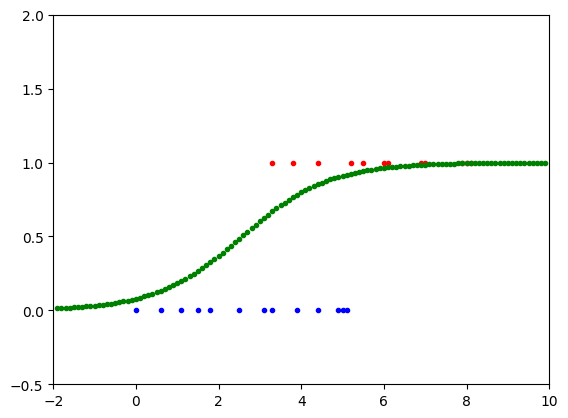

Prediction: [[0.005487 0.994513]]


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

# Logistic function: P = 1 / (1 + exp(-(b0 + b1 * x)))

# Data for class 0
x1 = np.array([0, 0.6, 1.1, 1.5, 1.8, 2.5, 3.3, 3.1, 3.9, 4.4, 4.9, 5, 5.1])
y1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Data for class 1
x2 = np.array([3.3, 3.8, 4.4, 5.2, 5.5, 6, 6.1, 6.9, 7, 7.9, 8, 8.1])
y2 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Combine data into one dataset
X = np.array([[0], [0.6], [1.1], [1.5], [1.8], [2.5], [3.3], [3.1], [3.9], [4.4], [4.9], [5], [5.1],
              [3], [3.8], [4.4], [5.2], [5.5], [6], [6.1], [6.9], [7], [7.9], [8], [8.1]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Plot data points
plt.plot(x1, y1, '.', color='blue')
plt.plot(x2, y2, '.', color='red')

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

print("b0 is:", model.intercept_)
print("b1 is:", model.coef_)

# Logistic function for visualization
def logistic(classifier, x):
    return 1 / (1 + np.exp(-(model.intercept_ + model.coef_ * x)))

# Plot logistic function
for i in range(1, 120):
    plt.plot(i / 10.0 - 2, logistic(model, i / 10.0), '.', color='green')

plt.axis([-2, 10, -0.5, 2])
plt.show()

# Prediction for a given value
pred = model.predict_proba([[10]])  # 2D array for sklearn compatibility
print("Prediction:", pred)


**LogisticRegression2**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score  # Import cross_val_score here
from sklearn.metrics import confusion_matrix, accuracy_score
from google.colab import files
import numpy as np

# Step 1: Upload the file

file_path = '/content/sample_data/creditset.csv'

# Step 2: Load the dataset
credit_data = pd.read_csv(file_path)  # Ensure the file name matches
print(credit_data.head())
print(credit_data.describe())
print(credit_data.corr())

# Step 3: Define features and target
features = credit_data[["income", "age", "loan"]]
target = credit_data["default10yr"]  # Ensure this matches your column name

# Step 4: Split the data into training and testing sets
feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)

# Step 5: Train and test the model
model = LogisticRegression()
model.fit(feature_train, target_train)
predictions = model.predict(feature_test)

# Step 6: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))
print("Accuracy Score:")
print(accuracy_score(target_test, predictions))

# Step 7: Evaluate the model with cross-validation
scores = cross_val_score(model, features, target, cv=10)  # Use cross_val_score
print("Cross-Validation Scores:")
print(scores)
print("Mean Cross-Validation Score:")
print(scores.mean())


   clientid        income        age         loan       LTI  default10yr
0         1  66155.925095  59.017015  8106.532131  0.122537            0
1         2  34415.153966  48.117153  6564.745018  0.190752            0
2         3  57317.170063  63.108049  8020.953296  0.139940            0
3         4  42709.534201  45.751972  6103.642260  0.142911            0
4         5  66952.688845  18.584336  8770.099235  0.130989            1
          clientid        income          age          loan          LTI  \
count  2000.000000   2000.000000  2000.000000   2000.000000  2000.000000   
mean   1000.500000  45331.600018    40.927143   4444.369695     0.098403   
std     577.494589  14326.327119    13.262450   3045.410024     0.057620   
min       1.000000  20014.489470    18.055189      1.377630     0.000049   
25%     500.750000  32796.459717    29.062492   1939.708847     0.047903   
50%    1000.500000  45789.117313    41.382673   3974.719419     0.099437   
75%    1500.250000  57791.2816

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**KNearestClassifier1**

[1]


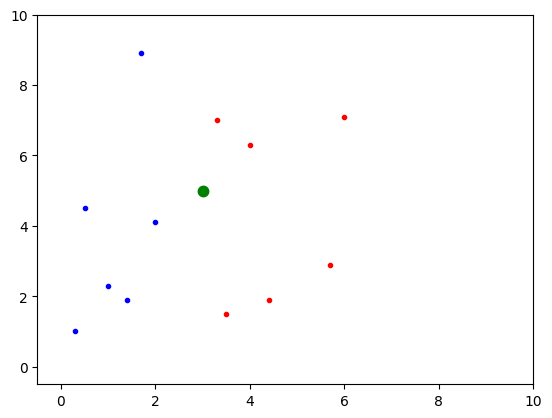

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

xBlue = np.array([0.3, 0.5, 1, 1.4, 1.7, 2])
yBlue = np.array([1, 4.5, 2.3, 1.9, 8.9, 4.1])

xRed = np.array([3.3, 3.5, 4, 4.4, 5.7, 6])
yRed = np.array([7, 1.5, 6.3, 1.9, 2.9, 7.1])

# Correctly define X and y to have the same number of samples
X = np.array([[0.3, 1], [0.5, 4.5], [1, 2.3], [1.4, 1.9], [1.7, 8.9], [2, 4.1],
              [3.3, 7], [3.5, 1], [3.5, 5]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1])  # Match the number of elements in X

plt.plot(xBlue, yBlue, '.', color='blue')
plt.plot(xRed, yRed, '.', color='red')
plt.plot(3, 5, '.', color='green', markersize=15)
plt.axis([-0.5, 10, -0.5, 10])

classifier = KNeighborsClassifier(n_neighbors=3)  # This is the k value
classifier.fit(X, y)

pred = classifier.predict(np.array([[3, 5]]))
print(pred)

plt.show()


**KNearestalgorithm2(minmaxnormalization)**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier  # Corrected import
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing

# Step 1: Define the file path to the dataset
file_path = '/content/sample_data/creditset.csv'

# Step 2: Load the dataset
credit_data = pd.read_csv(file_path)

# Step 3: Extract features and target
features = credit_data[["income", "age", "loan"]]
target = credit_data["default10yr"]  # Ensure this matches your column name

# Step 3.1: Normalize the features
features = preprocessing.MinMaxScaler().fit_transform(features)

# Step 4: Split the data into training and testing sets
feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)

# Step 5: Train and test the model
model = KNeighborsClassifier(n_neighbors=20)  # Corrected KNeighborsClassifier
model.fit(feature_train, target_train)
predictions = model.predict(feature_test)

# Step 6: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))
print("Accuracy Score:")
print(accuracy_score(target_test, predictions))


Confusion Matrix:
[[507   1]
 [ 15  77]]
Accuracy Score:
0.9733333333333334


**KNearestwithcrossvalidation**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier  # Corrected import
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing

# Step 1: Define the file path to the dataset
file_path = '/content/sample_data/creditset.csv'

# Step 2: Load the dataset
credit_data = pd.read_csv(file_path)

# Step 3: Extract features and target
features = credit_data[["income", "age", "loan"]]
target = credit_data["default10yr"]  # Ensure this matches your column name

# Step 3.1: Normalize the features
features = preprocessing.MinMaxScaler().fit_transform(features)

# Step 4: Split the data into training and testing sets
feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)

# Step 5: Train and test the model
model = KNeighborsClassifier(n_neighbors=20)  # Corrected KNeighborsClassifier
model.fit(feature_train, target_train)
predictions = model.predict(feature_test)  # Use feature_test for predictions

cross_valid_scores = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, features, target, cv=10, scoring='accuracy')
    cross_valid_scores.append(scores.mean())

print("Optimal k with cross-validation:", np.argmax(cross_valid_scores) + 1)

# Train the model with the optimal k
knn_best = KNeighborsClassifier(n_neighbors=np.argmax(cross_valid_scores) + 1)
knn_best.fit(features, target)

# Make predictions on the test features
predictions = knn_best.predict(feature_test)

# Step 6: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))
print("Accuracy Score:")
print(accuracy_score(target_test, predictions))

Optimal k with cross-validation: 33
Confusion Matrix:
[[507   1]
 [  6  86]]
Accuracy Score:
0.9883333333333333


Naive_bayes_classifier1

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB  # Corrected import
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing

# Step 1: Define the file path to the dataset
file_path = '/content/drive/MyDrive/dataset/creditset.csv'

# Step 2: Load the dataset
credit_data = pd.read_csv(file_path)

# Step 3: Define features and target
features = credit_data[["income", "age", "loan"]]
target = credit_data["default10yr"]  # Ensure this matches your column name

# Step 4: Split the data into training and testing sets
feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)

# Step 5: Train and test the model
model = GaussianNB()  # Corrected KNeighborsClassifier
model.fit(feature_train, target_train)
predictions = model.predict(feature_test)  # Use feature_te


# Step 6: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))
print("Accuracy Score:")
print(accuracy_score(target_test, predictions))

Confusion Matrix:
[[499   9]
 [ 38  54]]
Accuracy Score:
0.9216666666666666


*Naive_Bayes_text_clustering*

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform(["I like machine learning and clustering algorithms",
                                 "Apples, oranges and any kind of fruits are healthy",
                                 "Is it feasible with machine learning algorithm?",
                                 "My family is happy because of the healthy fruits"])

# print (tfidf.A)  # Uncomment to print the TF-IDF matrix
print((tfidf * tfidf.T).A)  # Print the similarity matrix

[[1.         0.10300035 0.23274405 0.        ]
 [0.10300035 1.         0.         0.24908972]
 [0.23274405 0.         1.         0.09380898]
 [0.         0.24908972 0.09380898 1.        ]]


*Naive_bayes_news_text_clustering*

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

trainingData = fetch_20newsgroups(subset='train', categories=categories, shuffle=True)

# print("\n".join(trainingData.data[1].split("\n")[:30]))
# print("Target is:", trainingData.target_names[trainingData.target[1]])

# we just count the word occurances
countVectorizer = CountVectorizer()
xTrainCounts = countVectorizer.fit_transform(trainingData.data)
# print(countVectorizer.vocabulary_.get(u'software'))

# we transform the word occurances into tfidf
# TfidfVectorizer = CountVectorizer + TfidfTransformer
tfidfTransformer = TfidfTransformer()
xTrainTfidf = tfidfTransformer.fit_transform(xTrainCounts)

model = MultinomialNB().fit(xTrainTfidf, trainingData.target)

new = ['This has nothing to do with church or religion', 'Software engineering is getting hotter and hotter nowadays']
xNewCounts = countVectorizer.transform(new)
xNewTfidf = tfidfTransformer.transform(xNewCounts)

predicted = model.predict(xNewTfidf)

for doc, category in zip(new, predicted):
    print('Document:', doc)
    print('Predicted Category:', trainingData.target_names[category])

Document: This has nothing to do with church or religion
Predicted Category: soc.religion.christian
Document: Software engineering is getting hotter and hotter nowadays
Predicted Category: comp.graphics


*Support_vector_machine1*

[1]


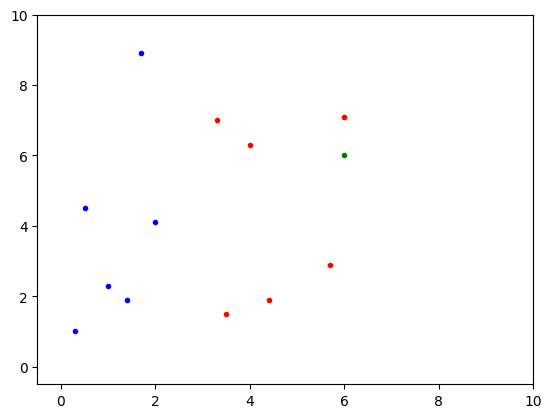

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm
import numpy as np

xBlue = np.array([0.3,0.5,1,1.4,1.7,2])
yBlue = np.array([1,4.5,2.3,1.9,8.9,4.1])

xRed = np.array([3.3,3.5,4,4.4,5.7,6])
yRed = np.array([7,1.5,6.3,1.9,2.9,7.1])

X = np.array([[0.3,1], [0.5,4.5], [1,2.3], [1.4,1.9], [1.7,8.9], [2,4.1], [3.3,7], [3.5,1.5], [4,6.3], [4.4,1.9], [5.7,2.9], [6,7.1]])
y = np.array([0,0,0,0,0,0,1,1,1,1,1,1]) # 0: blue class, 1: red class

plt.plot(xBlue, yBlue, '.', color='blue')
plt.plot(xRed, yRed, '.', color='red')
plt.plot(6,6,'.',color='green')

# Important parameters for SVC: gamma and C
# gamma -> defines how far the influence of a single training example reaches
#   Low value: influence reaches far
#   High value: influence reaches close

# C -> trades off hyperplane surface simplicity + training examples misclassifications
#   Low value: simple/smooth hyperplane surface
#   High value: all training examples classified correctly but complex surface

classifier = svm.SVC()
classifier.fit(X,y)

print(classifier.predict(np.array([[6, 6]])))
plt.axis([-0.5,10,-0.5,10])
plt.show()

*Support_vector_machine2*

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import datasets

dataset = datasets.load_iris()

#print(dataset)


features = dataset.data
targetVariables = dataset.target

featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, targetVariables, test_size=0.3)

# Create an SVM model with specified parameters
#model = svm.SVC(gamma=0.001, C=100)
MODEL = svm.SVC()

fittedModel = model.fit(featureTrain, targetTrain)

predictions = fittedModel.predict(featureTest)

print("Confusion Matrix:")
print(confusion_matrix(targetTest, predictions))
print("Accuracy Score:")
print(accuracy_score(targetTest, predictions))

Confusion Matrix:
[[16  0  0]
 [ 0 18  1]
 [ 0  0 10]]
Accuracy Score:
0.9777777777777777


Support_Vector_Machine_3

Confusion matrix:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  2  0  1  4  0]
 [ 0  0  0  0 45  0  0  0  1  2]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0  0 40  0]
 [ 0  0  0  1  0  1  0  0  0 43]]
0.9666666666666667
Prediction for test image:  [9]


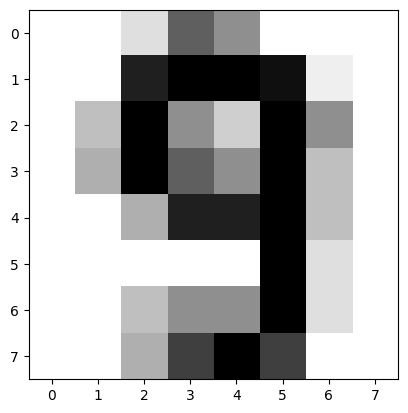

In [ ]:
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()

#print("Digits\n", digits)

images_and_labels = list(zip(digits.images, digits.target))

#for index, (image, label) in enumerate(images_and_labels[:6]):
#    plt.subplot(2, 3, index + 1)
#    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#    plt.title('Target: %i' % label)


n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

trainTestSplit = int(n_samples*0.75)
classifier.fit(data[:trainTestSplit], digits.target[:trainTestSplit])

expected = digits.target[trainTestSplit:]
predicted = classifier.predict(data[trainTestSplit:])

#print("Classification report for classifier %s:\n%s\n"
#% (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print(accuracy_score(expected, predicted))

plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation='nearest')
print("Prediction for test image: ", classifier.predict(data[-2].reshape(1,-1)))

plt.show()


Decision_Tree1

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

data = pd.read_csv("/content/drive/MyDrive/dataset/Iris_Data.csv")

print(data.head())

features = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
targets = data.species

feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='entropy')

model.fit(feature_train, target_train)

predictions = model.predict(feature_test)
print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))

print("Accuracy Score (Train/Test Split):", accuracy_score(target_test, predictions))
predicted = cross_val_predict(model, features, targets, cv=10)

print("Accuracy Score (Cross-Validation):", accuracy_score(targets, predicted))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score (Train/Test Split): 1.0
Accuracy Score (Cross-Validation): 0.9533333333333334


*Decision_tree2*

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/dataset/Iris_Data.csv")

print(data.head())

features = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
targets = data.species

param_grid = {'max_depth': np.arange(1, 10)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

feature_train, feature_test, target_train, target_test = train_test_split(features, targets)
tree.fit(feature_train, target_train)
tree_predictions = tree.predict_proba(feature_test)[:, 1]

print("Best parameter with Grid Search: ", tree.best_params_)

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Best parameter with Grid Search:  {'max_depth': 2}


*Gini_index_approach*

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

data = pd.read_csv("/content/drive/MyDrive/dataset/Iris_Data.csv")

print(data.head())

features = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
targets = data.species

feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini')

model.fit(feature_train, target_train)

predictions = model.predict(feature_test)

print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))

print("Accuracy Score (Train/Test Split):", accuracy_score(target_test, predictions))

predicted = cross_val_predict(model, features, targets, cv=10)

print("Accuracy Score (Cross-Validation):", accuracy_score(targets, predicted))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score (Train/Test Split): 1.0
Accuracy Score (Cross-Validation): 0.9533333333333334


Random_forest_credits

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Logistic regression accuracy: 93%
# we do better with knn: 97.5% !!!!!!!!
# 84% simple kNN without normalizing the dataset
# we can achieve ~ 99% with random forests

credit_data = pd.read_csv("/content/drive/MyDrive/dataset/creditset.csv")

#print(credit_data.head())
#print(credit_data.describe())
#print(credit_data.corr())

features = credit_data[["income","age","loan"]]
targets = credit_data.default10yr

feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=.2)

model = RandomForestClassifier(n_estimators=1000, max_features='sqrt')
fitted_model = model.fit(feature_train, target_train)
predictions = fitted_model.predict(feature_test)
print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))
print("Accuracy:")
print(accuracy_score(target_test, predictions))

Confusion Matrix:
[[349   0]
 [  4  47]]
Accuracy:
0.99


Random_forest_iris

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets

dataset = datasets.load_iris()

features = dataset.data
targets = dataset.target

feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=.2)

model = RandomForestClassifier(n_estimators=1000, max_features='sqrt')
fitted_model = model.fit(feature_train, target_train)
predictions = fitted_model.predict(feature_test)

print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))

[[10  0  0]
 [ 0  9  2]
 [ 0  1  8]]
0.9


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

dataset = datasets.load_digits()

image_features = dataset.images.reshape((len(dataset.images), -1))
image_targets = dataset.target

random_forest_model = RandomForestClassifier(n_jobs=-1,max_features='sqrt')

feature_train, feature_test, target_train, target_test = train_test_split(image_features, image_targets, test_size=.2)

param_grid = {
    "n_estimators" : [10,100,500,1000],
    "max_depth" : [1,5,10,15],
    "min_samples_leaf" : [1,2,3,4,5,10,15,20,30,40,50]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=10)
grid_search.fit(feature_train, target_train)
print(grid_search.best_params_)

optimal_estimators = grid_search.best_params_.get("n_estimators")
optimal_depth = grid_search.best_params_.get("max_depth")
optimal_leaf = grid_search.best_params_.get("min_samples_leaf")

best_model = RandomForestClassifier(n_estimators=optimal_estimators, max_depth=optimal_depth, max_features='sqrt', min_samples_leaf = optimal_leaf)
k_fold = model_selection.KFold(n_splits=10, random_state=123)

predictions = model_selection.cross_val_predict(best_model, feature_test, target_test, cv=k_fold)
print("Accuracy of the tuned model: ", accuracy_score(target_test, predictions))

PCA

(1797, 8, 8)


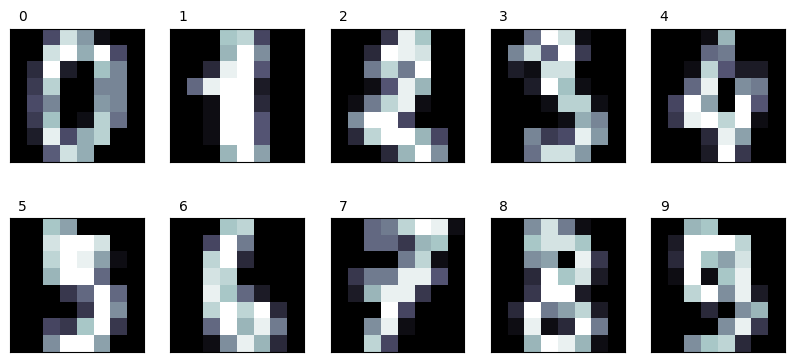

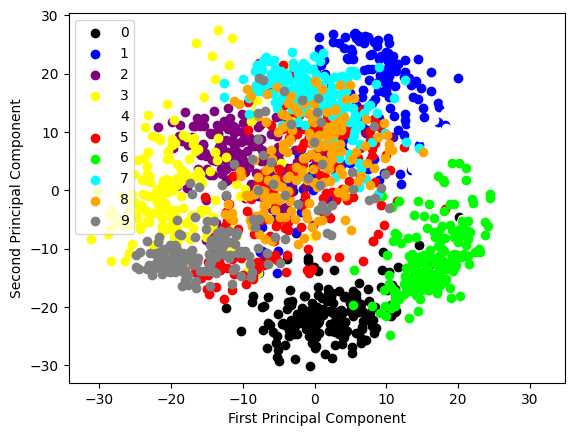

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

# 8x8 pixel per image -> 64 features !!! Humans are not able to cope with this
#	This is why we use PCA -> reduce the dimenions: we can visualize the data in 2D!!!
# We want to investigate if the distribution after PCA reveals the
#  distribution of the different classes, and if they are clearly separable

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

print(digits.images.shape)

n_row, n_col, max_n = 2, 5, 10

fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
i=0

while i < max_n and i < digits.images.shape[0]:
	p = fig.add_subplot(n_row, n_col, i + 1, xticks=[],
	yticks=[])
	p.imshow(digits.images[i], cmap=plt.cm.bone,interpolation='nearest')
	#label the image with the target value
	p.text(0, -1, str(digits.target[i]))
	i = i + 1

plt.show()

estimator = PCA(n_components=10)
X_pca = estimator.fit_transform(X_digits)

colors = ['black', 'blue', 'purple', 'yellow', 'white','red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
	px = X_pca[:, 0][y_digits == i]
	py = X_pca[:, 1][y_digits == i]
	plt.scatter(px, py, c=colors[i])
	plt.legend(digits.target_names)
	plt.xlabel('First Principal Component')
	plt.ylabel('Second Principal Component')

plt.show()



Kmeans_Clustering

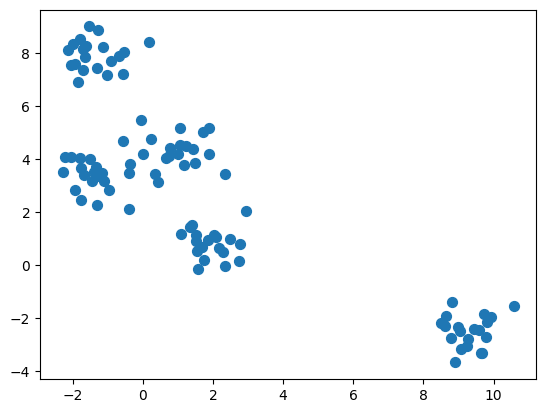

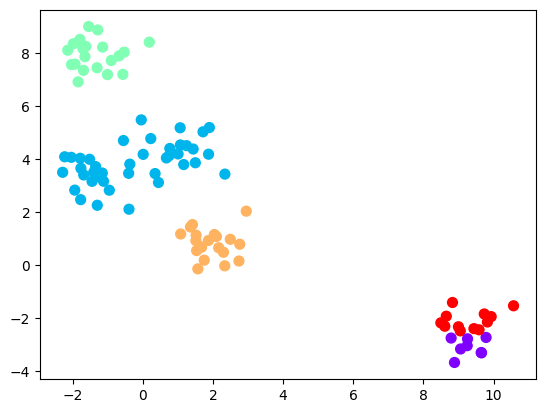

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=100,centers=5,random_state=0,cluster_std=0.6)
plt.scatter(x[:,0],x[:,1],s=50)

plt.show()

est = KMeans(5)
est.fit(x)
y_kmeans = est.predict(x)

plt.scatter(x[:,0],x[:,1],c=y_kmeans, s=50,cmap='rainbow')
plt.show()

Kmeans_Clustering2

[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
[1 0 1 0 1 0]
Coordinate:  [1. 2.]  label:  1
Coordinate:  [5. 8.]  label:  0
Coordinate:  [1.5 1.8]  label:  1
Coordinate:  [8. 8.]  label:  0
Coordinate:  [1.  0.6]  label:  1
Coordinate:  [ 9. 11.]  label:  0


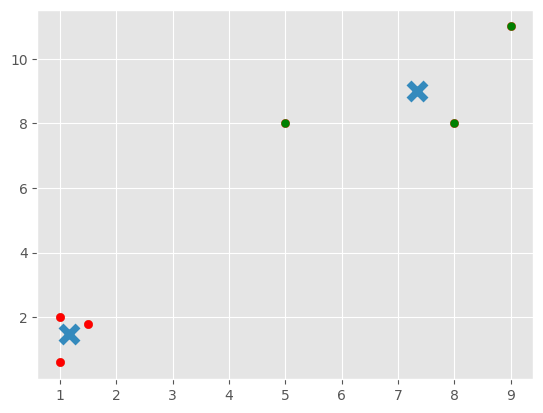

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

x=[1,5,1.5,8,1,9]
y=[2,8,1.8,8,0.6,11]

plt.scatter(x,y)

array = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(array)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print (centroids)
print (labels)

colors = ["g.","r."]

for i in range(len(x)):
	print ("Coordinate: ", array[i], " label: ", labels[i])
	plt.plot(array[i][0],array[i][1],colors[labels[i]], markersize=10)

plt.scatter(centroids[:,0],centroids[:,1], marker="x",s=150,linewidth=5,zorder=10)
plt.show()


KText_cluster

In [ ]:
import collections
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint

nltk.download('punkt_tab')
nltk.download('stopwords')


def tokenizer(text):
		tokens = word_tokenize(text)
		stemmer = PorterStemmer()
		tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]
		return tokens


def cluster_sentences(sentences, nb_of_clusters=2):

		# create tf ifd again: stopwords-> we filter out common words (I,my, the, and...)
		tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words=stopwords.words('english'),lowercase=True)
		#builds a tf-idf matrix for the sentences
		tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
		kmeans = KMeans(n_clusters=nb_of_clusters)
		kmeans.fit(tfidf_matrix)
		clusters = collections.defaultdict(list)
		for i, label in enumerate(kmeans.labels_):
			clusters[label].append(i)
		return dict(clusters)


if __name__ == "__main__":
		sentences = ["Quantuum physics is quite important in science nowadays.",
				"Software engineering is hotter and hotter topic in the silicon valley",
				"Investing in stocks and trading with them are not that easy",
				"FOREX is the stock market for trading currencies",
				"Warren Buffet is famous for making good investments. He knows stock markets"]
		nclusters= 2
		clusters = cluster_sentences(sentences, nclusters)
		for cluster in range(nclusters):
				print("CLUSTER ",cluster,":")
				for i,sentence in enumerate(clusters[cluster]):
					print("\tSENTENCE ",i,": ",sentences[sentence])



CLUSTER  0 :
	SENTENCE  0 :  Quantuum physics is quite important in science nowadays.
	SENTENCE  1 :  Software engineering is hotter and hotter topic in the silicon valley
CLUSTER  1 :
	SENTENCE  0 :  Investing in stocks and trading with them are not that easy
	SENTENCE  1 :  FOREX is the stock market for trading currencies
	SENTENCE  2 :  Warren Buffet is famous for making good investments. He knows stock markets


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Hierarchical clustering

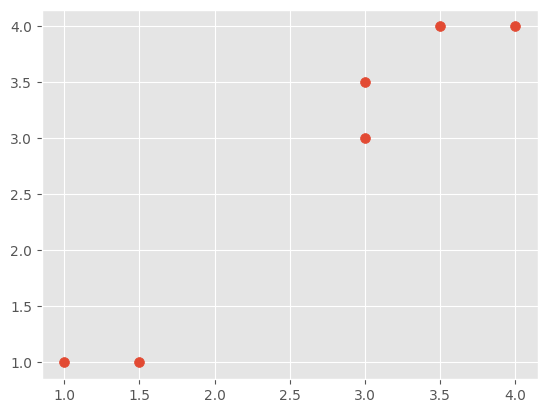

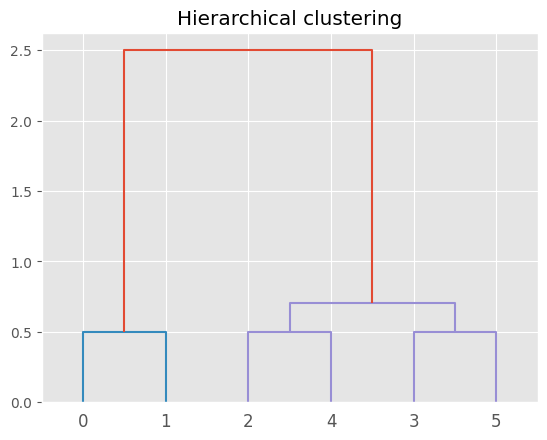

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x = np.array([[1,1],[1.5,1],[3,3],[4,4],[3,3.5],[3.5,4]])
plt.scatter(x[:,0],x[:,1],s=50)

plt.show()

linkage_matrix = linkage(x, "single")

dendrogram = dendrogram(linkage_matrix,truncate_mode='none')

plt.title("Hierarchical clustering")

plt.show()

DBSCAN

This is the dataset we want to classify with DBSCAN!


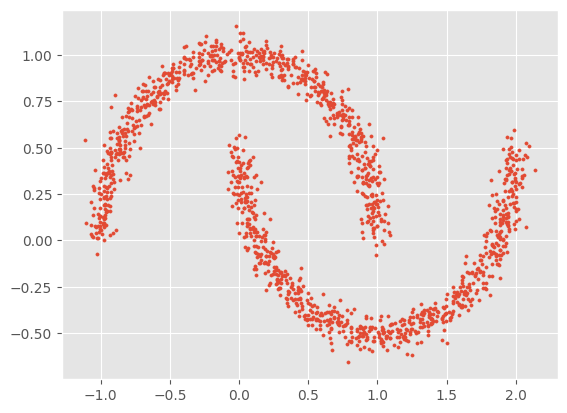

These are the clusters with DBSCAN!


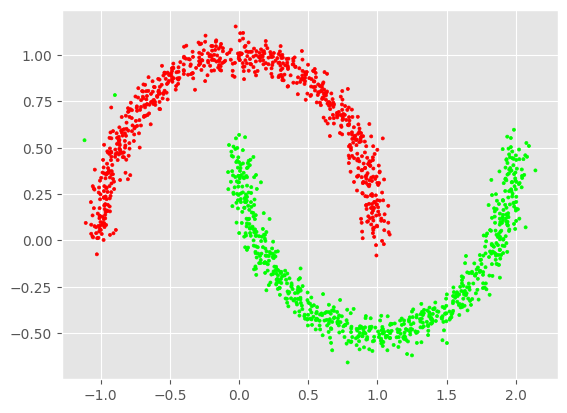

These are the clusters with DBSCAN!


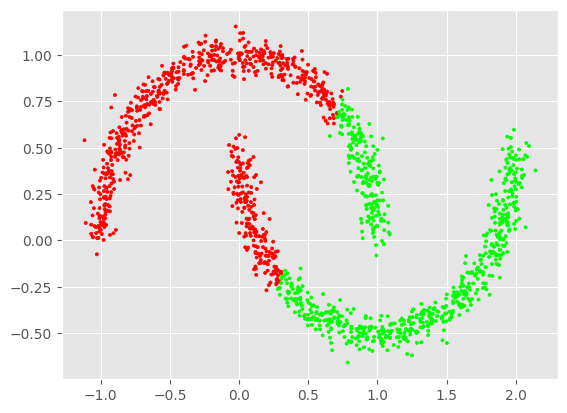

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np

X,y = datasets.make_moons(n_samples=1500, noise=.05)

x1 = X[:,0]
x2 = X[:,1]

print("This is the dataset we want to classify with DBSCAN!")
plt.scatter(x1,x2,s=5)
plt.show()

#results with DBSCAN algorithm
dbscan = DBSCAN(eps=0.1)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)

colors = np.array(['#ff0000', '#00ff00'])

print("These are the clusters with DBSCAN!")
plt.scatter(x1,x2,s=5,color=colors[y_pred])
plt.show()

#results with K-Means Clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.labels_.astype(int)

colors = np.array(['#ff0000', '#00ff00'])

print("These are the clusters with DBSCAN!")
plt.scatter(x1,x2,s=5,color=colors[y_pred])
plt.show()